In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# Define base directories
base_dirs = {
    'less1mm': '/xdisk/sylvia/temakgoale/DYAMOND/DYAMOND_PRECEFF/TIME_AVERAGING_CWP_FILTERED/',
    'greater1mm': '/xdisk/sylvia/temakgoale/DYAMOND/DYAMOND_PRECEFF/PRECEFF_TIMEAVG_CWP_FILTERED/',
    'cloud_water_path': '/xdisk/sylvia/temakgoale/DYAMOND/ICE_PATH_PRECEFF/',
}

models = ['FV3', 'GEOS5', 'ICON', 'HadGEM3', 'NICAM', 'SAM']
domains = ['ocean', 'land']

# Load datasets
def load_datasets(base_dir, variable, models, domains):
    datasets = []
    for model in models:
        for domain in domains:
            filename = f"{base_dir}{model}_{variable}_{domain}_values.nc"
            ds = xr.open_dataset(filename)
            datasets.append(ds['PRECEFF_TIMEAVG'][0].values[~np.isnan(ds['PRECEFF_TIMEAVG'][0].values)])
    return datasets


# Load data for each variable and condition
datasets_less1mm = load_datasets(base_dirs['less1mm'], 'PRECEFF_less1mm_hr_20160809-20160909_Asia_timeavg', models, domains)
datasets_greater1mm = load_datasets(base_dirs['greater1mm'], 'PRECEFF_1mm_hr_20160809-20160909_Asia_timeavg', models, domains)
datasets_cwp_less1mm = load_datasets(base_dirs['cloud_water_path'], 'CLOUD_WATER_PATH_PRECEFF_less1mm_hr_20160809-20160909_Asia_timeavg', models, domains)
datasets_cwp_greater1mm = load_datasets(base_dirs['cloud_water_path'], 'CLOUD_WATER_PATH_PRECEFF_1mm_hr_20160809-20160909_Asia_timeavg', models, domains)

# Colors and labels
colors = ['blue', 'blue', 'green', 'green', 'purple', 'purple', 'red', 'red', 'cyan', 'cyan', 'yellow', 'yellow']
labels = [f"{model} ({domain})" for model in models for domain in domains]


# Plotting function
def plot_box(ax, data, ylabel, title, letter, show_xticks=False):
    box = ax.boxplot(data, patch_artist=True, showfliers=False)
    for patch, color in zip(box['boxes'], colors):
        patch.set(facecolor='white', edgecolor=color, linewidth=3)
    for element in ['whiskers', 'caps', 'medians']:
        for item in box[element]:
            item.set(linewidth=3)
    ax.set_yscale('log')
#    ax.set_ylim(1e-5, 1e-0)
    ax.set_ylabel(ylabel, fontsize=40)
    ax.set_title(title, fontsize=40)
    ax.tick_params(axis='y', labelsize=35)
    ax.set_ylim((10**-5, 10**-0))
    ax.text(0.1, 0.85, f"$\\bf{{({letter})}}$", transform=ax.transAxes, fontsize=40)
    if show_xticks:
        ax.set_xticks(range(1, len(labels) + 1))
        ax.set_xticklabels(labels, rotation=60, fontsize=30)
    else:
        ax.set_xticks([])
    ax.set_yticks(ax.get_yticks())

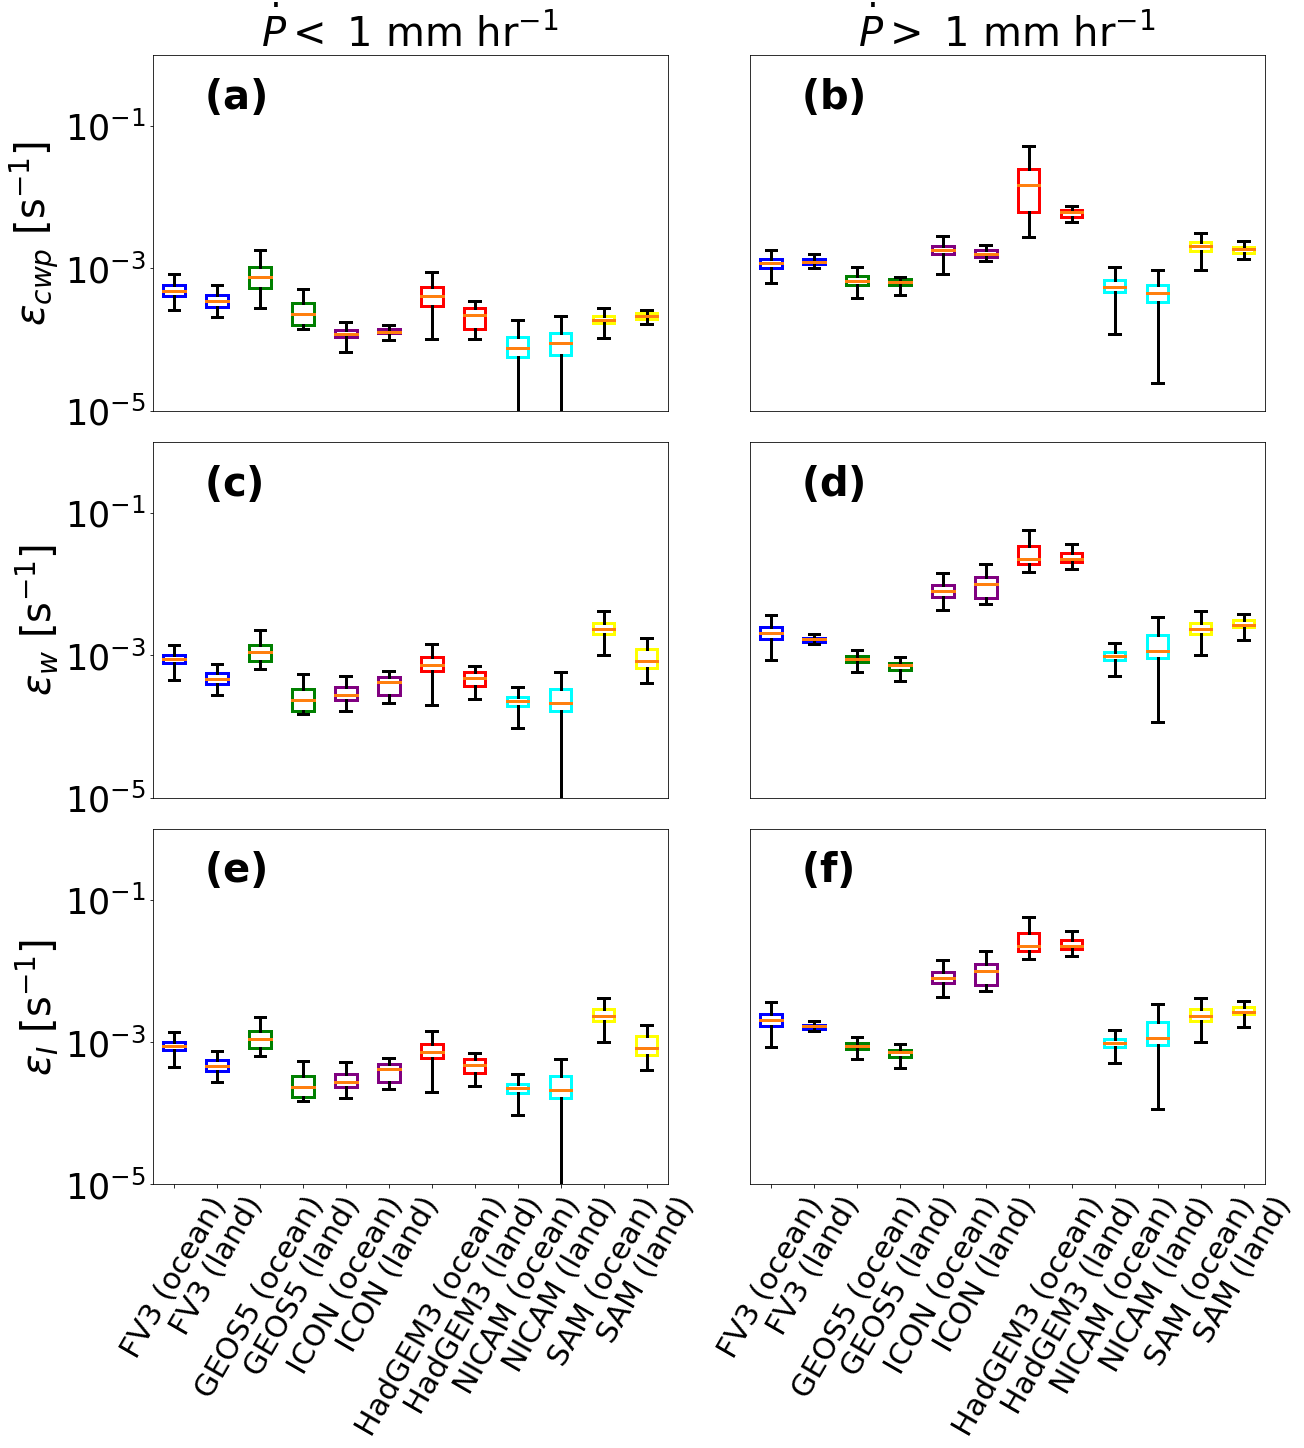

In [17]:
# Create the figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 20), constrained_layout=True)

plot_box(axes[0, 0], datasets_less1mm, r'$\epsilon_{cwp}$ [s$^{-1}$]', r'$\dot{P} <$ 1 mm hr$^{-1}$', 'a')
plot_box(axes[0, 1], datasets_greater1mm, '', r'$\dot{P} >$ 1 mm hr$^{-1}$', 'b')
plot_box(axes[1, 0], datasets_cwp_less1mm, r'$\epsilon_{w}$ [s$^{-1}$]', '', 'c')
plot_box(axes[1, 1], datasets_cwp_greater1mm, '', '', 'd')
plot_box(axes[2, 0], datasets_cwp_less1mm, r'$\epsilon_{I}$ [s$^{-1}$]', '', 'e', show_xticks=True)
plot_box(axes[2, 1], datasets_cwp_greater1mm, '', '', 'f', show_xticks=True)
axes[0, 0].set_ylim(1e-5, 1e-0)
axes[0, 1].set_ylim(1e-5, 1e-0)
axes[1, 0].set_ylim(1e-5, 1e-0)
axes[1, 1].set_ylim(1e-5, 1e-0)
axes[2, 0].set_ylim(1e-5, 1e-0)
axes[2, 1].set_ylim(1e-5, 1e-0)
axes[0, 1].set_yticks([])  # Plot (b)
axes[1, 1].set_yticks([])  # Plot (d)
axes[2, 1].set_yticks([])  # Plot (f)
plt.show()